Загрузка данных 

In [6]:
import pandas as pd
import ast

# Загрузка данных с обработкой возможных ошибок
try:
    df = pd.read_csv('categorized_comments.csv', encoding='utf-8-sig', on_bad_lines='warn')
except pd.errors.ParserError:
    df = pd.read_csv('categorized_comments.csv', encoding='utf-8-sig', on_bad_lines='skip')

# Список всех категорий для преобразования
categories_list = [
    'Нравится скорость отработки заявок',
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен',
    'Вопрос не решен'
]

# Функция для преобразования строки с категориями в список
def parse_categories(cat_str):
    if pd.isna(cat_str):
        return []
    try:
        # Удаляем лишние пробелы и кавычки
        cat_str = str(cat_str).strip()
        if not cat_str or cat_str == '[]':
            return []
        
        # Пробуем преобразовать строку в список
        if cat_str.startswith('[') and cat_str.endswith(']'):
            try:
                return ast.literal_eval(cat_str)
            except:
                # Если не получается, обрабатываем вручную
                return [c.strip(" '\"") for c in cat_str.strip("[]").split(",") if c.strip()]
        return [cat_str]
    except:
        return []

# Применяем функцию к столбцу categories
df['categories_parsed'] = df['categories'].apply(parse_categories)

# Создаем бинарные столбцы для каждой категории
for category in categories_list:
    df[category] = df['categories_parsed'].apply(lambda x: 1 if category in x else 0)

# Удаляем временные столбцы
df.drop(['categories', 'categories_parsed'], axis=1, inplace=True, errors='ignore')

# Переименовываем столбцы для удобства (по желанию)
column_rename = {
    'Нравится скорость отработки заявок': 'Скорость',
    'Нравится качество выполнения заявки': 'Качество выполнения',
    'Нравится качество работы сотрудников': 'Качество сотрудников',
    'Понравилось выполнение заявки': 'Выполнение заявки',
    'Вопрос решен': 'Вопрос решен',
    'Вопрос не решен': 'Вопрос не решен'
}
df.rename(columns=column_rename, inplace=True)

# Сохраняем результат
output_columns = ['id', 'rating', 'comment'] + list(column_rename.values())
df[output_columns].to_csv('comments_with_binary_categories.csv', index=False, encoding='utf-8-sig')

# Выводим первые 5 строк для проверки
print(df[output_columns].head())

        id  rating                                       comment  Скорость  \
0  2945792       5                                       спасибо         0   
1  3234340       5                                      спасибо!         0   
2  3380332       5                                      Отлично          0   
3  3381812       5  Благодарю за оперативное решение проблемы !          1   
4  3691620       5                                      Спасибо          0   

   Качество выполнения  Качество сотрудников  Выполнение заявки  Вопрос решен  \
0                    0                     0                  0             1   
1                    0                     0                  0             1   
2                    1                     0                  0             0   
3                    0                     0                  1             1   
4                    0                     0                  0             1   

   Вопрос не решен  
0                0  
1 

C:\Users\vovan\AppData\Local\Temp\ipykernel_6840\2653676897.py:6: ParserWarning: Skipping line 6: expected 9 fields, saw 11

  df = pd.read_csv('categorized_comments.csv', encoding='utf-8-sig', on_bad_lines='warn')


Пропуски в данных:
id                      0
rating                  0
comment                 0
Скорость                0
Качество выполнения     0
Качество сотрудников    0
Выполнение заявки       0
Вопрос решен            0
Вопрос не решен         0
dtype: int64

Доступные категории: ['Скорость', 'Качество выполнения', 'Качество сотрудников', 'Выполнение заявки', 'Вопрос решен', 'Вопрос не решен']

Распределение оценок:
rating
1      13
2       3
3       5
4      12
5    2224
Name: count, dtype: int64

Распределение целевой переменной:
target
1    0.990696
0    0.009304
Name: proportion, dtype: float64

Корреляция признаков:


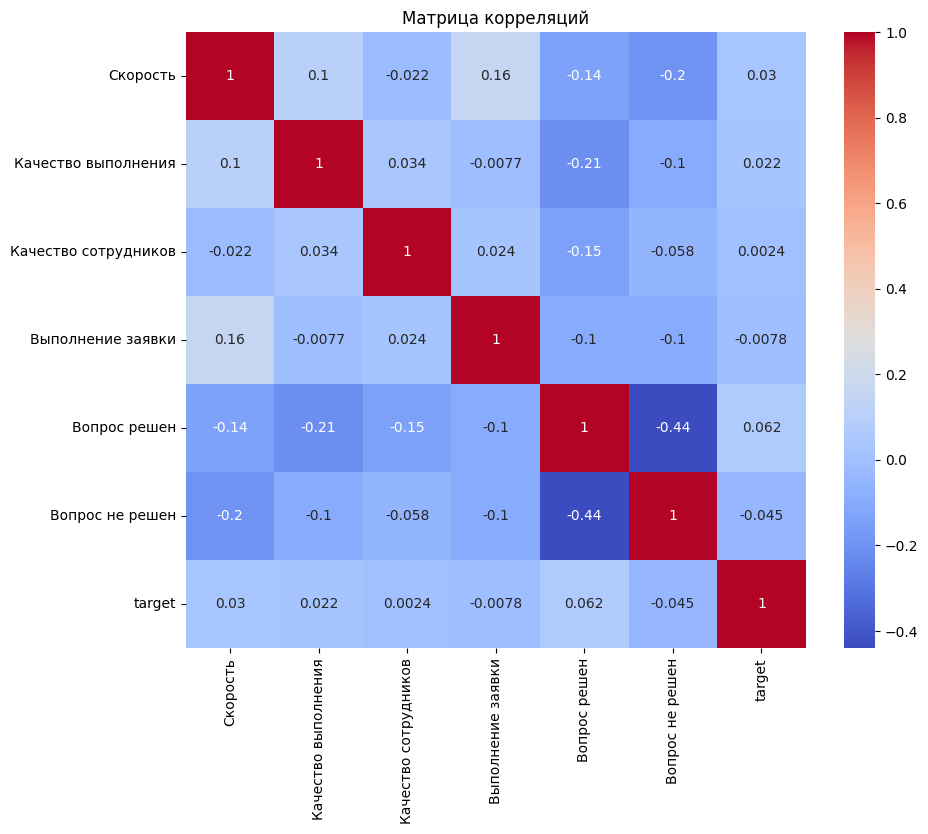


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.99      1.00      1.00       672

    accuracy                           0.99       678
   macro avg       0.50      0.50      0.50       678
weighted avg       0.98      0.99      0.99       678

ROC-AUC: 0.5964


C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.99      1.00      1.00       672

    accuracy                           0.99       678
   macro avg       0.50      0.50      0.50       678
weighted avg       0.98      0.99      0.99       678

ROC-AUC: 0.6228


C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

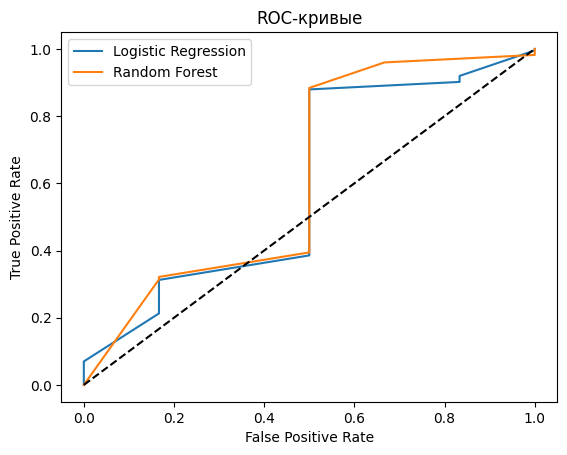


Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Лучший ROC-AUC: 0.5660652357936703

=== Оптимизированная модель ===
ROC-AUC: 0.6228
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.99      1.00      1.00       672

    accuracy                           0.99       678
   macro avg       0.50      0.50      0.50       678
weighted avg       0.98      0.99      0.99       678



C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

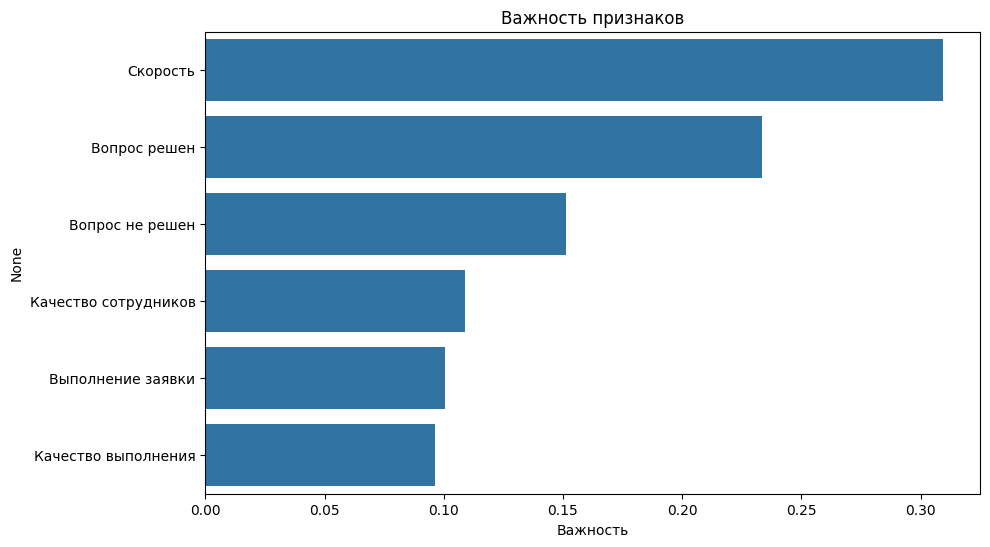

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, 
                             confusion_matrix, classification_report,
                             r2_score, mean_squared_error)
from sklearn.model_selection import GridSearchCV

# 1. Загрузка и предобработка данных
def load_and_preprocess(file_path):
    # Загрузка данных
    try:
        df = pd.read_csv("comments_with_binary_categories.csv", encoding='utf-8-sig', on_bad_lines='warn')
    except:
        df = pd.read_csv("comments_with_binary_categories.csv", encoding='utf-8-sig', on_bad_lines='skip')
    
    # Проверка пропусков
    print("Пропуски в данных:")
    print(df.isnull().sum())
    
    # Удаление строк с пропусками в ключевых столбцах
    df = df.dropna(subset=['rating', 'comment'])
    
    # Список категорий (бинарных столбцов)
    categories_list = [
        'Скорость',
        'Качество выполнения',
        'Качество сотрудников',
        'Выполнение заявки',
        'Вопрос решен',
        'Вопрос не решен'
    ]
    
    # Проверяем наличие всех категорий в данных
    available_categories = [col for col in categories_list if col in df.columns]
    print("\nДоступные категории:", available_categories)
    
    # Создание целевой переменной (пример: 1 если rating >= 4, иначе 0)
    df['target'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    
    return df, available_categories

# 2. Анализ данных
def explore_data(df, categories_list):
    print("\nРаспределение оценок:")
    print(df['rating'].value_counts().sort_index())
    
    print("\nРаспределение целевой переменной:")
    print(df['target'].value_counts(normalize=True))
    
    if categories_list:  # Проверяем, есть ли категории для анализа
        print("\nКорреляция признаков:")
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[categories_list + ['target']].corr(), annot=True, cmap='coolwarm')
        plt.title("Матрица корреляций")
        plt.show()
    else:
        print("\nНет категорий для анализа корреляции")

# 3. Подготовка данных для моделирования
def prepare_data(df, categories_list):
    if not categories_list:
        raise ValueError("Нет признаков для обучения модели")
    
    # Признаки и целевая переменная
    X = df[categories_list]
    y = df['target']
    
    # Разделение на train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Масштабирование числовых признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# 4. Обучение и оценка моделей
def train_and_evaluate(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # Обучение модели
        model.fit(X_train, y_train)
        
        # Предсказания
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Оценка качества
        metrics = {
            "accuracy": accuracy_score(y_test, y_pred),
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1": f1_score(y_test, y_pred)
        }
        
        if y_proba is not None:
            metrics["roc_auc"] = roc_auc_score(y_test, y_proba)
        
        results[name] = metrics
        
        # Вывод метрик
        print(f"\n=== {name} ===")
        print(classification_report(y_test, y_pred))
        
        if y_proba is not None:
            print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
            
            # ROC-кривая
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            plt.plot(fpr, tpr, label=name)
    
    # Визуализация ROC-кривых
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривые')
    plt.legend()
    plt.show()
    
    return results

# 5. Оптимизация модели
def optimize_model(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )
    
    grid_search.fit(X_train, y_train)
    
    print("\nЛучшие параметры:", grid_search.best_params_)
    print("Лучший ROC-AUC:", grid_search.best_score_)
    
    return grid_search.best_estimator_

# Основной пайплайн
def main():
    # 1. Загрузка и предобработка
    file_path = 'comments_with_binary_categories.csv'
    df, categories_list = load_and_preprocess(file_path)
    
    # 2. Анализ данных
    explore_data(df, categories_list)
    
    # 3. Подготовка данных
    try:
        X_train, X_test, y_train, y_test, scaler = prepare_data(df, categories_list)
    except ValueError as e:
        print(f"Ошибка: {e}")
        return
    
    # 4. Обучение и оценка моделей
    results = train_and_evaluate(X_train, X_test, y_train, y_test)
    
    # 5. Оптимизация лучшей модели
    best_model = optimize_model(X_train, y_train)
    
    # Оценка оптимизированной модели
    y_pred_optimized = best_model.predict(X_test)
    y_proba_optimized = best_model.predict_proba(X_test)[:, 1]
    
    print("\n=== Оптимизированная модель ===")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_optimized):.4f}")
    print(classification_report(y_test, y_pred_optimized))
    
    # Важность признаков
    plt.figure(figsize=(10, 6))
    feature_importances = pd.Series(
        best_model.feature_importances_,
        index=categories_list
    ).sort_values(ascending=False)
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title('Важность признаков')
    plt.xlabel('Важность')
    plt.show()

if __name__ == "__main__":
    main()

Пропуски в данных:
id                      0
rating                  0
comment                 0
Скорость                0
Качество выполнения     0
Качество сотрудников    0
Выполнение заявки       0
Вопрос решен            0
Вопрос не решен         0
dtype: int64

Доступные категории: ['Скорость', 'Качество выполнения', 'Качество сотрудников', 'Выполнение заявки', 'Вопрос решен', 'Вопрос не решен']

Распределение оценок:
rating
1      13
2       3
3       5
4      12
5    2224
Name: count, dtype: int64

Распределение целевой переменной:
target
1    0.990696
0    0.009304
Name: proportion, dtype: float64

Корреляция признаков:


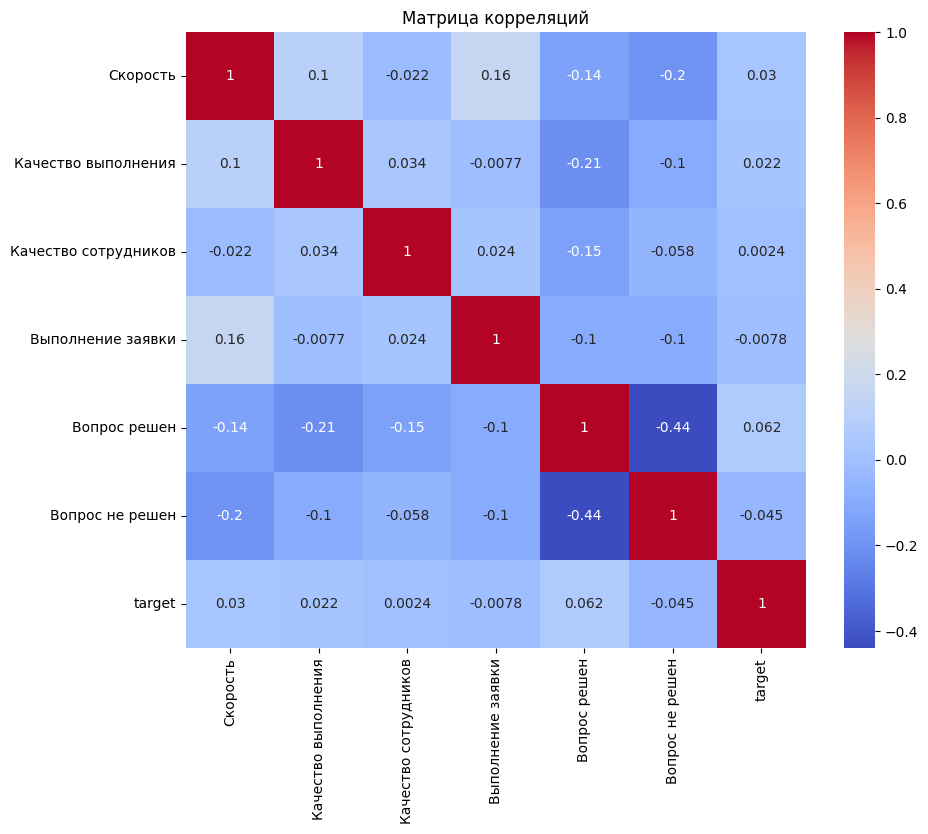


=== Logistic Regression ===
Accuracy: 0.9912
Precision: 0.9912
Recall: 1.0000
F1-score: 0.9956
ROC-AUC: 0.5964


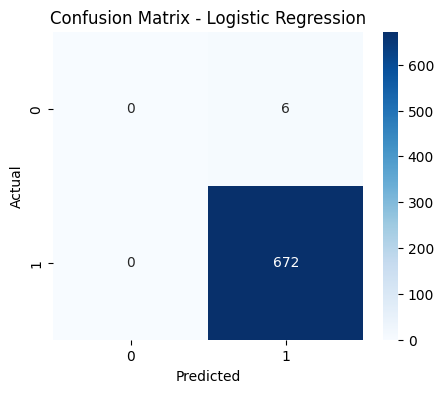


=== Random Forest ===
Accuracy: 0.9912
Precision: 0.9912
Recall: 1.0000
F1-score: 0.9956
ROC-AUC: 0.6228


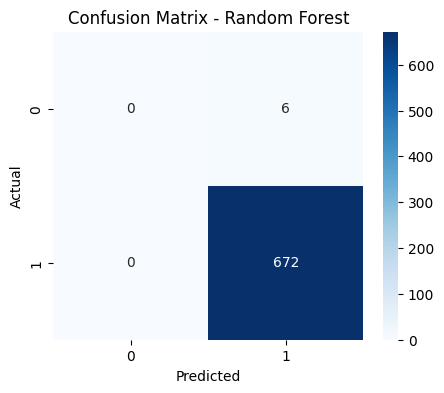

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Лучшие параметры:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

=== Оптимизированная модель ===
ROC-AUC: 0.6228
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.99      1.00      1.00       672

    accuracy                           0.99       678
   macro avg       0.50      0.50      0.50       678
weighted avg       0.98      0.99      0.99       678



C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vovan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

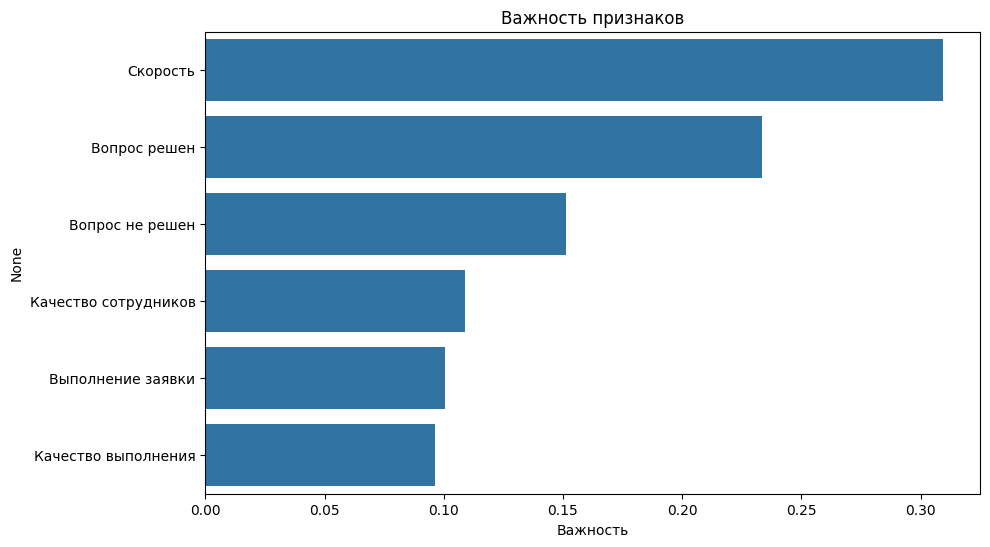

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, 
                             confusion_matrix, classification_report,
                             r2_score, mean_squared_error)
from sklearn.model_selection import GridSearchCV

# 1. Загрузка и предобработка данных
def load_and_preprocess(file_path):
    # Загрузка данных
    try:
        df = pd.read_csv("comments_with_binary_categories.csv", encoding='utf-8-sig', on_bad_lines='warn')
    except:
        df = pd.read_csv("comments_with_binary_categories.csv", encoding='utf-8-sig', on_bad_lines='skip')
    
    # Проверка пропусков
    print("Пропуски в данных:")
    print(df.isnull().sum())
    
    # Удаление строк с пропусками в ключевых столбцах
    df = df.dropna(subset=['rating', 'comment'])
    
    # Список категорий (бинарных столбцов)
    categories_list = [
        'Скорость',
        'Качество выполнения',
        'Качество сотрудников',
        'Выполнение заявки',
        'Вопрос решен',
        'Вопрос не решен'
    ]
    
    # Проверяем наличие всех категорий в данных
    available_categories = [col for col in categories_list if col in df.columns]
    print("\nДоступные категории:", available_categories)
    
    # Создание целевой переменной (пример: 1 если rating >= 4, иначе 0)
    df['target'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    
    return df, available_categories

# 2. Анализ данных
def explore_data(df, categories_list):
    print("\nРаспределение оценок:")
    print(df['rating'].value_counts().sort_index())
    
    print("\nРаспределение целевой переменной:")
    print(df['target'].value_counts(normalize=True))
    
    if categories_list:  # Проверяем, есть ли категории для анализа
        print("\nКорреляция признаков:")
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[categories_list + ['target']].corr(), annot=True, cmap='coolwarm')
        plt.title("Матрица корреляций")
        plt.show()
    else:
        print("\nНет категорий для анализа корреляции")

# 3. Подготовка данных для моделирования
def prepare_data(df, categories_list):
    if not categories_list:
        raise ValueError("Нет признаков для обучения модели")
    
    # Признаки и целевая переменная
    X = df[categories_list]
    y = df['target']
    
    # Разделение на train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Масштабирование числовых признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# 4. Обучение и оценка моделей
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Инициализация моделей
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # Обучение модели
        model.fit(X_train, y_train)
        
        # Предсказания
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Метрики
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_proba) if y_proba is not None else None
        }
        
        results[name] = metrics
        
        # Вывод результатов
        print(f"\n=== {name} ===")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1-score: {metrics['f1']:.4f}")
        if metrics['roc_auc'] is not None:
            print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
        
        # Матрица ошибок
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    
    return results

# 5. Оптимизация модели
def optimize_model(X_train, y_train):
    # Параметры для GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Инициализация модели и GridSearch
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                             cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
    
    # Поиск лучших параметров
    grid_search.fit(X_train, y_train)
    
    # Вывод лучших параметров
    print("\nЛучшие параметры:")
    print(grid_search.best_params_)
    
    return grid_search.best_estimator_

# Основной пайплайн
def main():
    # 1. Загрузка и предобработка
    file_path = 'comments_with_binary_categories.csv'
    df, categories_list = load_and_preprocess(file_path)
    
    # 2. Анализ данных
    explore_data(df, categories_list)
    
    # 3. Подготовка данных
    try:
        X_train, X_test, y_train, y_test, scaler = prepare_data(df, categories_list)
    except ValueError as e:
        print(f"Ошибка: {e}")
        return
    
    # 4. Обучение и оценка моделей
    results = train_and_evaluate(X_train, X_test, y_train, y_test)
    
    # 5. Оптимизация лучшей модели
    best_model = optimize_model(X_train, y_train)
    
    # Оценка оптимизированной модели
    y_pred_optimized = best_model.predict(X_test)
    y_proba_optimized = best_model.predict_proba(X_test)[:, 1]
    
    print("\n=== Оптимизированная модель ===")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_optimized):.4f}")
    print(classification_report(y_test, y_pred_optimized))
    
    # Важность признаков
    plt.figure(figsize=(10, 6))
    feature_importances = pd.Series(
        best_model.feature_importances_,
        index=categories_list
    ).sort_values(ascending=False)
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title('Важность признаков')
    plt.xlabel('Важность')
    plt.show()

if __name__ == "__main__":
    main()